#Student Name: Michel Danjou
#Student ID:18263461

# Problem description:
    
A man has the flu and needs to take pills to get better.
    
There are 2 types of pills in his medecine cabinet.

  * **pill-a**: which is just vitamines and has no effect on the flu virus.

  * **pill-b**: which contains an agent killing the virus and needs to be taken for **4 consecutive days in order to defeat the virus.**
    
Unfortunately all the pills have been mixed together in the same box 
and there is no way to distinguish between them.
    
The man decides to randomly take a pill each day and wait until he gets better.
    
We want to know how long it will take the man to be virus free.
    
We want to repeat the simulation for *1000* people and figure out:
    1. The mean value of the recovery time
    2. The standard variation of the recovery time
        

In [22]:
%reset

import random
import matplotlib.pyplot as plt
import numpy as np

def generate_box_of_pills(nb_pill_in_box):
    pills = ['pill-a', "pill-b"]
    box = []
    for i in range(nb_pill_in_box):
        box.append(random.choice(pills))
    return box


def run_experiment(box, goal):
    pill_b_consecutive_counter = 0
    total_nb_pills = len(box)
    for i in range(total_nb_pills):
        pill_taken = box.pop()
        if (pill_taken =='pill-a'):
            pill_b_consecutive_counter = 0
        elif (pill_taken =='pill-b'):
            pill_b_consecutive_counter += 1
            if pill_b_consecutive_counter == goal:
                return i
        else:
            print("Hum, don't know about that pill. Skippint it!")
            
    return None
    

def run_test_campaign(nb_patients):        
    test_campaign_results = []
    for i in range(nb_patients):
        patient_box = generate_box_of_pills(200)    
        days = run_experiment(patient_box, nb_consecutive_days_for_pill_b_success)        
        test_campaign_results.append(days)
        #print("Patient: ", i, " - Nb of days taken to be curred:", days)

    return test_campaign_results


def find_mean(campain_results):
    total_days=0
    for i in range(len(campain_results)):
        if campain_results[i-1] != None:
            total_days += campain_results[i-1]
    return int(total_days/len(campain_results))


def remove_uncurred_people_from_campain_results(campain_results):
    currated_results = []
    for i in range(len(campain_results)):
        if campain_results[i] != None:
            #print("campain_result[", i, "]=", campain_results[i])
            currated_results.append(campain_results[i])
    return currated_results
    

def find_nb_uncurred_people(campain_results):
    nb_uncurred = 0
    for i in range(len(campain_results)):
        if campain_results[i-1] == None:
            nb_uncurred += 1
    return nb_uncurred


def find_standard_deviation(campaign_results):
    data = np.array(campaign_results)
    std = data.std()
    return std 


def find_min_max(campaign_results):
    data = np.array(campaign_results)
    min = data.min()
    max = data.max()
    return (min, max)


def summarize(data):
    summarized_data = []
    for i in range(len(data)):
        counter = 0
        for j in range(len(data)):
            if data[j]==i:
                counter += 1
        summarized_data.append(counter)
    return summarized_data




Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Simulation for 1 patient
Please note that the patient is "poping" the pills from the box. Internally I am using the pop() method which takes elements from the **end of the list.**

In [23]:
# Important parameters
nb_consecutive_days_for_pill_b_success = 4
nb_pills_in_box = 200

# Test the code for 1 patient
box = generate_box_of_pills(nb_pills_in_box)
recovery_time = run_experiment(box, nb_consecutive_days_for_pill_b_success)
print("box:", box)
print("recovery time: ", recovery_time)

box: ['pill-b', 'pill-a', 'pill-a', 'pill-a', 'pill-a', 'pill-a', 'pill-b', 'pill-b', 'pill-a', 'pill-a', 'pill-b', 'pill-a', 'pill-b', 'pill-a', 'pill-b', 'pill-b', 'pill-a', 'pill-b', 'pill-b', 'pill-a', 'pill-b', 'pill-b', 'pill-b', 'pill-b', 'pill-b', 'pill-b', 'pill-b', 'pill-a', 'pill-a', 'pill-a', 'pill-b', 'pill-a', 'pill-a', 'pill-a', 'pill-a', 'pill-a', 'pill-a', 'pill-b', 'pill-a', 'pill-a', 'pill-a', 'pill-b', 'pill-a', 'pill-b', 'pill-a', 'pill-b', 'pill-b', 'pill-b', 'pill-a', 'pill-a', 'pill-a', 'pill-b', 'pill-b', 'pill-b', 'pill-b', 'pill-a', 'pill-b', 'pill-a', 'pill-b', 'pill-a', 'pill-a', 'pill-b', 'pill-a', 'pill-b', 'pill-b', 'pill-a', 'pill-b', 'pill-a', 'pill-a', 'pill-b', 'pill-b', 'pill-a', 'pill-b', 'pill-a', 'pill-a', 'pill-a', 'pill-a', 'pill-b', 'pill-a', 'pill-a', 'pill-b', 'pill-b', 'pill-b', 'pill-a', 'pill-a', 'pill-a', 'pill-a', 'pill-a', 'pill-b', 'pill-b', 'pill-a', 'pill-b', 'pill-b', 'pill-b', 'pill-b', 'pill-a', 'pill-a', 'pill-b', 'pill-a', 'pil

# Simulation for a large number of patients

In [24]:
nb_patients = 1000

campaign results: [8, 7, 21, 15, 15, 29, 28, 15, 19, 49, 15, 5, 47, 35, 40, 33, 39, 32, 46, 12, 14, 82, 72, 4, 3, 11, 20, 39, 16, 82, 9, 11, 5, 51, 27, 36, 10, 59, 60, 25, 8, 10, 42, 7, 10, 19, 27, 56, 27, 18, 16, 16, 9, 31, 9, 35, 33, 3, 14, 35, 48, 18, 17, 33, 30, 13, 3, 4, 23, 82, 23, 22, 13, 31, 8, 6, 33, 31, 57, 11, 85, 8, 7, 10, 19, 11, 66, 47, 75, 21, 19, 3, 3, 23, 15, 6, 59, 45, 3, 29, 10, 5, 20, 3, 3, 12, 41, 19, 24, 85, 5, 3, 23, 51, 33, 7, 14, 76, 18, 22, 37, 22, 12, 34, 50, 6, 3, 31, 5, 36, 18, 85, 6, 9, 60, 54, 13, 65, 12, 36, 61, 17, 118, 65, 21, 24, 5, 11, 16, 27, 5, 23, 28, 44, 10, 21, 53, 57, 11, 6, 21, 61, 71, 20, 15, 31, 36, 19, 93, 16, 38, 10, 11, 110, 12, 15, 4, 83, 5, 21, 48, 12, 21, 12, 31, 16, 55, 33, 28, 36, None, 82, 68, 5, 40, 14, 5, 7, 47, 12, 31, 43, 17, 31, 7, 3, 22, 42, 41, 10, 5, 8, 4, 26, 32, 12, 30, 20, 116, 3, 39, 23, 11, 8, 46, 3, 17, 48, 54, 13, 100, 30, 16, 153, 7, 50, 35, 132, 93, 13, 18, 17, 60, 3, 35, 11, 41, 29, 42, 13, 85, 44, 13, 9, 128, 46, 

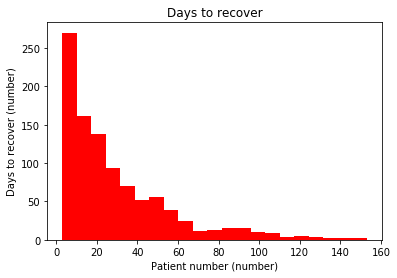

summarized data: [0, 0, 0, 63, 31, 32, 28, 40, 21, 25, 30, 35, 21, 18, 25, 22, 17, 23, 20, 20, 20, 19, 20, 20, 19, 11, 12, 16, 17, 11, 7, 19, 12, 13, 10, 13, 10, 7, 5, 10, 10, 9, 7, 4, 5, 7, 9, 12, 8, 7, 7, 7, 6, 6, 6, 4, 5, 4, 5, 4, 5, 3, 3, 3, 2, 6, 6, 2, 1, 1, 2, 1, 2, 2, 2, 2, 3, 1, 2, 2, 0, 3, 6, 3, 0, 5, 1, 0, 1, 2, 3, 1, 2, 4, 3, 1, 1, 2, 1, 3, 2, 0, 1, 0, 0, 0, 2, 4, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

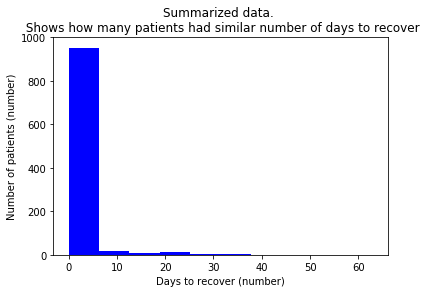

In [25]:
# Run test campaign
campaign_results = run_test_campaign(nb_patients)
print("campaign results:", campaign_results)
print("uncurred people:", find_nb_uncurred_people(campaign_results))

currated_results = remove_uncurred_people_from_campain_results(campaign_results)
min, max = find_min_max(currated_results)
print("currated results:", currated_results)
print("mean nb of days to be cured:", find_mean(currated_results))
print("min days:{}, max days:{}".format(min, max))

print("std:", find_standard_deviation(currated_results))

num_bins = 21
plt.hist(currated_results, num_bins, facecolor='red')

plt.title("Days to recover")
plt.xlabel("Patient number (number)")
plt.ylabel("Days to recover (number)")
plt.show()

summarized_data = summarize(currated_results)
print("summarized data:", summarized_data)

plt.hist(np.array(summarized_data), facecolor='blue')
plt.title("Summarized data. \n Shows how many patients had similar number of days to recover")
plt.xlabel("Days to recover (number)")
plt.ylabel("Number of patients (number)")
plt.show()